In [1]:
#for data processing
import pandas as pd
import numpy as np
import string
import re

#for plotting
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

#for nlp
from collections import Counter
import nltk
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#for regression model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import Ridge
from sklearn import svm
from sklearn import tree
from sklearn import neighbors
from sklearn import metrics

#for evaluation
import scipy
import warnings
warnings.filterwarnings("ignore")


In [2]:
#Loading Training Data

cols = ['id', 'text', 'label', 'intensity']

anger_train = pd.read_csv('D:/Assignment/anger-ratings-0to1.train.txt', header=None, sep='\t', names=cols, index_col=0)
fear_train = pd.read_csv('D:/Assignment/fear-ratings-0to1.train.txt', header=None, sep='\t', names=cols, index_col=0)
sad_train = pd.read_csv('D:/Assignment/sadness-ratings-0to1.train.txt', header=None, sep='\t', names=cols, index_col=0)
joy_train = pd.read_csv('D:/Assignment/joy-ratings-0to1.train.txt', header=None, sep='\t', names=cols, index_col=0)

In [3]:
#Loading Development Data

cols = ['id', 'text', 'label', 'intensity']

anger_dev = pd.read_csv('D:/Assignment/anger-ratings-0to1.dev.gold.txt', header=None, sep='\t', names=cols, index_col=0)
fear_dev = pd.read_csv('D:/Assignment/fear-ratings-0to1.dev.gold.txt', header=None, sep='\t', names=cols, index_col=0)
sad_dev = pd.read_csv('D:/Assignment/sadness-ratings-0to1.dev.gold.txt', header=None, sep='\t', names=cols, index_col=0)
joy_dev = pd.read_csv('D:/Assignment/joy-ratings-0to1.dev.gold.txt', header=None, sep='\t', names=cols, index_col=0)

In [4]:
#Loading Testing Data

cols = ['id', 'text', 'label', 'intensity']

anger_test = pd.read_csv('D:/Assignment/anger-ratings-0to1.test.target.txt', header=None, sep='\t', names=cols, index_col=0)
fear_test = pd.read_csv('D:/Assignment/fear-ratings-0to1.test.gold.txt', header=None, sep='\t', names=cols, index_col=0)
sad_test = pd.read_csv('D:/Assignment/sadness-ratings-0to1.test.gold.txt', header=None, sep='\t', names=cols, index_col=0)
joy_test = pd.read_csv('D:/Assignment/joy-ratings-0to1.test.gold.txt', header=None, sep='\t', names=cols, index_col=0)

In [5]:
anger_train.head()

,text,label,intensity
id,,,
10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
10001,So my Indian Uber driver just called someone t...,anger,0.896
10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [18]:
frames = [anger_train, fear_train, sad_train, joy_train]
data_training = pd.concat(frames)
data_training.reset_index(inplace=True)
data_training.label.value_counts()

label
fear       1147
anger       857
joy         823
sadness     786
Name: count, dtype: int64

In [107]:
data_training

,id,text,label,intensity
0,10000,how the fu k ! who the heck ! moved my fridge ...,anger,0.938
1,10001,so my indian uber driver just called someone t...,anger,0.896
2,10002,@username i asked for my parcel to be delivere...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,do not join @username they put the phone down ...,anger,0.896
...,...,...,...,...
3608,30818,it just the lack of company and liveliness out...,joy,0.058
3609,30819,quinn short hair makes me sad #glee,joy,0.040
3610,30820,hate overthinking e v e r y t h i n g like i j...,joy,0.040
3611,30821,people who cheer for sports teams completely o...,joy,0.020


In [108]:
punc = string.punctuation
training_data['word_count'] = training_data['text'].apply(lambda x:len(x.split()))
training_data['char_count'] = training_data['text'].apply(lambda x:len(x.replace(' ','')))
training_data['punc_count'] = training_data['text'].apply(lambda x:len([a for a in x if a in punc]))
training_data.head()

,id,text,label,intensity,word_count,char_count,punc_count
0,10000,how the fu k ! who the heck ! moved my fridge ...,anger,0.938,22,74,7
1,10001,so my indian uber driver just called someone t...,anger,0.896,25,99,1
2,10002,@username i asked for my parcel to be delivere...,anger,0.896,19,92,3
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896,24,111,13
4,10004,do not join @username they put the phone down ...,anger,0.896,26,102,3


# EDA

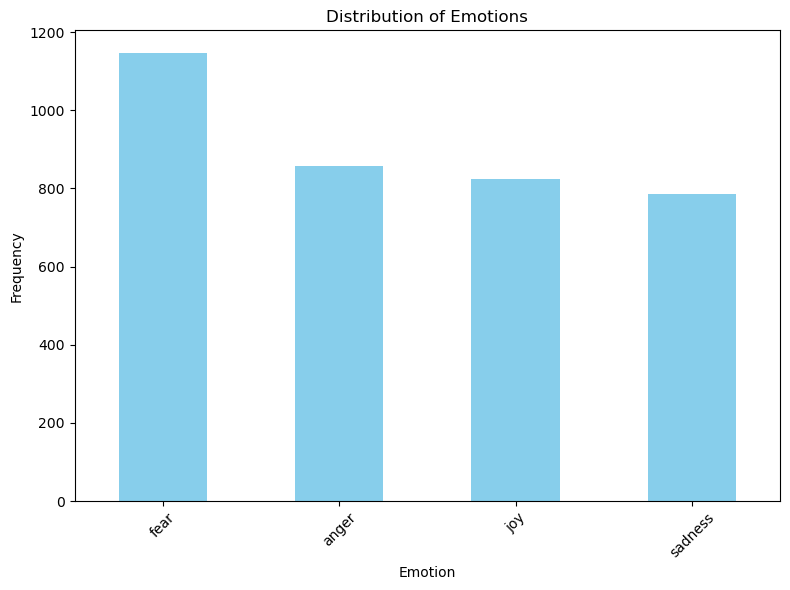

In [99]:
emotion_distribution = data_training['label'].value_counts()

plt.figure(figsize=(8, 6))
emotion_distribution.plot(kind='bar', color='skyblue')
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

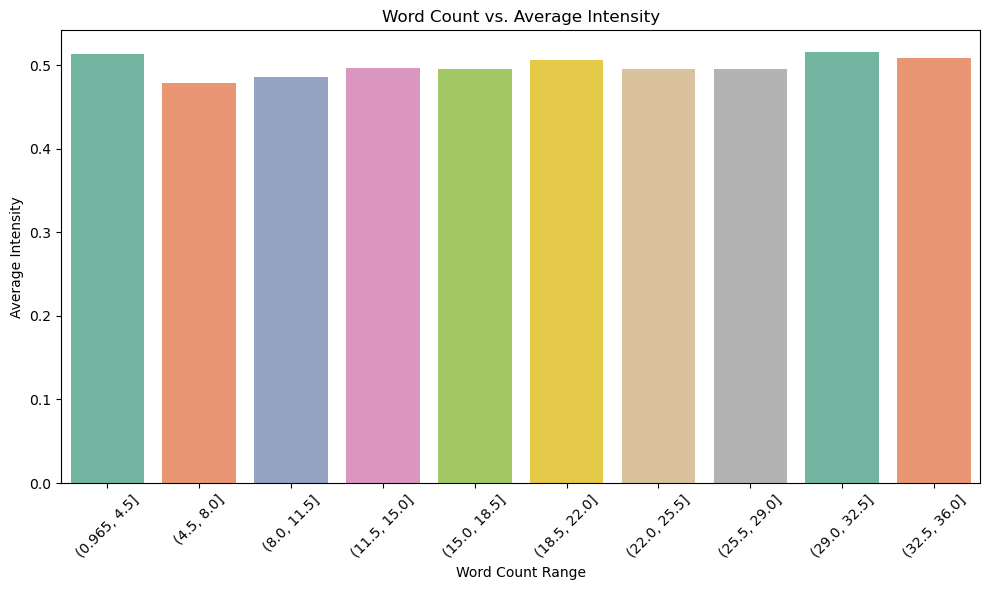

In [113]:
word_count_bins = pd.cut(training_data['word_count'], bins=10)
average_intensity = training_data.groupby(word_count_bins)['intensity'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=average_intensity.index.astype(str), y=average_intensity.values, palette='Set2')
plt.title('Word Count vs. Average Intensity')
plt.xlabel('Word Count Range')
plt.ylabel('Average Intensity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


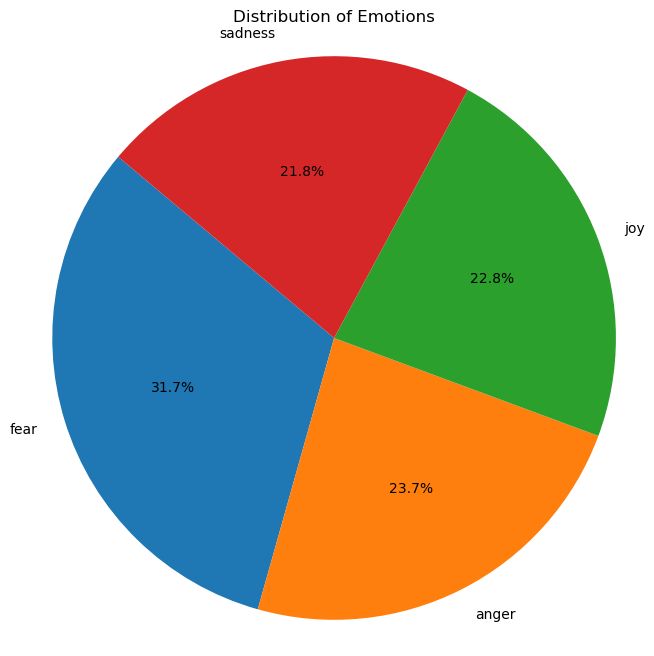

In [115]:
emotion_distribution = training_data['label'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(emotion_distribution, labels=emotion_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Emotions')
plt.axis('equal') 
plt.show()

In [118]:
text_sample = data_training['text'][0]
words = text_sample.split()
word_frequency = pd.Series(words).value_counts()
print("\nWord Frequency Analysis:")
print(word_frequency)


Word Frequency Analysis:
!           3
the         3
how         1
should      1
#mad        1
#angry      1
door        1
landlord    1
knock       1
i           1
fridge      1
my          1
moved       1
heck        1
who         1
k           1
fu          1
##          1
Name: count, dtype: int64


In [71]:
import re
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9_]+'
pat2 = r'https?://[A-Za-z0-9./]+'
pat3 = r'[0-9]+'
combined_pat = r'|'.join((pat1, pat2, pat3))
stop_words= set(stopwords.words('english'))

def tweet_cleaner(data_frame):
    print('Cleaning and parsing the tweets\n')
    clean_data = []
    for index, row in data_frame.iterrows():
        stripped = re.sub(combined_pat, '', row.text)
        lower_case = stripped.lower()
        words = tok.tokenize(lower_case)
        filtered_words = [w for w in words if not w in stop_words]
        clean_data.append((' '.join(filtered_words)).strip())

    print('Done!')
    return clean_data

def clean_text(text, stops=None):
    text = re.sub(r"@\w{1,15}", "@USERNAME", text)
    text = re.sub(r'\\n',' ',text)
    text = re.sub(r'&amp',' ',text)
    text = re.sub(r"[^A-Za-z0-9^,!.#\/'+=@]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " !", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)

    text = text.lower().split()
    
    if stops:
        text = [w for w in text if not w in stops]
    
    text = " ".join(text)
    
    return text


In [72]:
clean_data = tweet_clean(data_training)


Cleaning and parsing the tweets

Completed


In [73]:
data_training.text = pd.DataFrame(clean_data)
data_training.head()

,id,text,label,intensity
0,10000,how the fu k ! who the heck ! moved my fridge ...,anger,0.938
1,10001,so my indian uber driver just called someone t...,anger,0.896
2,10002,@username i asked for my parcel to be delivere...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,do not join @username they put the phone down ...,anger,0.896


In [74]:
data_training.columns

Index(['id', 'text', 'label', 'intensity'], dtype='object')

In [75]:
data_training

,id,text,label,intensity
0,10000,how the fu k ! who the heck ! moved my fridge ...,anger,0.938
1,10001,so my indian uber driver just called someone t...,anger,0.896
2,10002,@username i asked for my parcel to be delivere...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,do not join @username they put the phone down ...,anger,0.896
...,...,...,...,...
3608,30818,it just the lack of company and liveliness out...,joy,0.058
3609,30819,quinn short hair makes me sad #glee,joy,0.040
3610,30820,hate overthinking e v e r y t h i n g like i j...,joy,0.040
3611,30821,people who cheer for sports teams completely o...,joy,0.020


In [76]:
labels = pd.get_dummies(data_training['label'])

#applying bag of words and tf-idf technique to vectorise the tweets
vectorizer = CountVectorizer(max_features=1000, ngram_range=(1, 3))
X_BoW = vectorizer.fit_transform(data_training.text)
X_BoW = pd.DataFrame.sparse.from_spmatrix(X_BoW).join(labels)

vectorizer_tfidf = TfidfVectorizer(max_features=1000)
X_tfidf = vectorizer_tfidf.fit_transform(data_training.text)
X_tfidf = pd.DataFrame.sparse.from_spmatrix(X_tfidf).join(labels)

In [77]:
#Training Regression Models

#Linear Regression
X_BoW.columns = X_BoW.columns.astype(str)
X_tfidf.columns = X_tfidf.columns.astype(str)

BoW_linreg = LinearRegression().fit(X_BoW, data_training['intensity'])
tfidf_linreg = LinearRegression().fit(X_tfidf, data_training['intensity'])
#Ridge Regression
BoW_ridge = Ridge().fit(X_BoW, data_training['intensity'])
tfidf_ridge = Ridge().fit(X_tfidf, data_training['intensity'])
#Knn Regression
n_neighbors=5
BoW_knn = neighbors.KNeighborsRegressor(n_neighbors,weights='uniform').fit(X_BoW, data_training['intensity'])
tfidf_knn = neighbors.KNeighborsRegressor(n_neighbors,weights='uniform').fit(X_tfidf, data_training['intensity'])
#Decision Tree Regression
BoW_tree = tree.DecisionTreeRegressor(max_depth=1).fit(X_BoW, data_training['intensity'])
tfidf_tree = tree.DecisionTreeRegressor(max_depth=1).fit(X_tfidf, data_training['intensity'])
#Support Vector Regression
BoW_svr = svm.SVR().fit(X_BoW, data_training['intensity'])
tfidf_svr = svm.SVR().fit(X_tfidf, data_training['intensity'])

In [78]:
joy_dev.head()

,text,label,intensity
id,,,
30823,"@theclobra lol I thought maybe, couldn't decid...",joy,0.312
30824,Nawaz Sharif is getting more funnier than @kap...,joy,0.700
30825,Nawaz Sharif is getting more funnier than @kap...,joy,0.580
30826,@tomderivan73 😁...I'll just people watch and e...,joy,0.438
30827,I love my family so much #lucky #grateful #sma...,joy,0.936


In [79]:
frames = [anger_dev, fear_dev, sad_dev, joy_dev]
data_dev = pd.concat(frames)
data_dev.reset_index(inplace=True)
data_dev.label.value_counts()

label
fear       110
anger       84
joy         79
sadness     74
Name: count, dtype: int64

In [80]:
fear_dev.head()

,text,label,intensity
id,,,
21147,I know this is going to be one of those nights...,fear,0.771
21148,This is #horrible: Lewis Dunk has begun networ...,fear,0.479
21149,"@JeffersonLake speaking of ex cobblers, saw Ri...",fear,0.417
21150,@1johndes ball watching &amp; Rojo'd header wa...,fear,0.475
21151,"Really.....#Jumanji 2....w/ The Rock, Jack Bla...",fear,0.542


In [81]:
clean_data_dev = tweet_clean(data_dev)


Cleaning and parsing the tweets

Completed


In [82]:
data_dev.text = pd.DataFrame(clean_data_dev)
data_dev.head()

,id,text,label,intensity
0,10857,@username pls dont insult the word molna,anger,0.479
1,10858,@username i would have almost took offense to ...,anger,0.458
2,10859,@username that rutgers game was an abomination...,anger,0.562
3,10860,@username that what lisa asked before she star...,anger,0.500
4,10861,sometimes i get mad over something so minuscul...,anger,0.708


In [83]:
labels = pd.get_dummies(data_dev['label'])

X_Dev_BoW = vectorizer.transform(data_dev['text'])
X_Dev_BoW = pd.DataFrame.sparse.from_spmatrix(X_Dev_BoW).join(labels)

X_Dev_tfidf = vectorizer_tfidf.transform(data_dev['text'])
X_Dev_tfidf = pd.DataFrame.sparse.from_spmatrix(X_Dev_tfidf).join(labels)

In [84]:

#define function to get the scores
def get_score(y_test, y_pred, name):
    print(name + '\n')
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
    print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('-------------------------------------------------------------------------------')

In [121]:
X_Dev_BoW.columns = X_Dev_BoW.columns.astype(str)
X_Dev_tfidf.columns = X_Dev_tfidf.columns.astype(str)

get_score(data_dev['intensity'], BoW_linreg.predict(X_Dev_BoW), "BoW-Linear Regression")
get_score(data_dev['intensity'], tfidf_linreg.predict(X_Dev_tfidf), "Tfidf-Linear Regression")

get_score(data_dev['intensity'], BoW_ridge.predict(X_Dev_BoW), "BoW-Ridge Regression")
get_score(data_dev['intensity'], tfidf_ridge.predict(X_Dev_BoW), "Tfidf-Ridge Regression")


get_score(data_dev['intensity'], BoW_tree.predict(X_Dev_BoW), "BoW-Decision Tree Regression")
get_score(data_dev['intensity'], tfidf_tree.predict(X_Dev_tfidf), "Tfidf-Decision Tree Regression")

get_score(data_dev['intensity'], BoW_svr.predict(X_Dev_BoW), "BoW-SVR")
get_score(data_dev['intensity'], tfidf_svr.predict(X_Dev_tfidf), "Tfidf-SVR")

BoW-Linear Regression

Mean Absolute Error: 0.1517613979196686
Mean Squared Error: 0.03753542634203249
Root Mean Squared Error: 0.193740616139292
-------------------------------------------------------------------------------
Tfidf-Linear Regression

Mean Absolute Error: 0.14213205263868875
Mean Squared Error: 0.034155131352592266
Root Mean Squared Error: 0.18481106934540545
-------------------------------------------------------------------------------
BoW-Ridge Regression

Mean Absolute Error: 0.14472833510297708
Mean Squared Error: 0.034180664887728474
Root Mean Squared Error: 0.1848801365418375
-------------------------------------------------------------------------------
Tfidf-Ridge Regression

Mean Absolute Error: 0.3633851537453991
Mean Squared Error: 0.2237231205987232
Root Mean Squared Error: 0.4729937849472477
-------------------------------------------------------------------------------
BoW-Decision Tree Regression

Mean Absolute Error: 0.14923909502585425
Mean Squared Err

In [86]:
y_actual = data_dev['intensity']
y_predicted = tfidf_svr.predict(X_Dev_tfidf)

pd.DataFrame(data={"Actual Intensity" : data_dev['intensity'], "Predicted Intensity" : tfidf_svr.predict(X_Dev_tfidf)})

,Actual Intensity,Predicted Intensity
0,0.479,0.463810
1,0.458,0.453209
2,0.562,0.604355
3,0.500,0.559877
4,0.708,0.539754
...,...,...
342,0.580,0.503057
343,0.170,0.464663
344,0.396,0.337853
345,0.156,0.350236


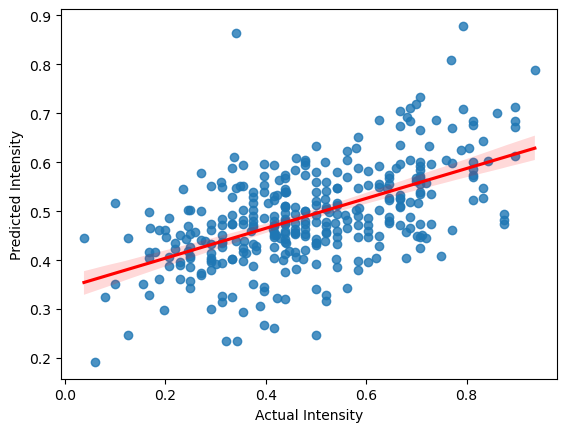

In [87]:
sns.regplot(x=y_actual, y=y_predicted, line_kws={'color':'red'})
plt.xlabel("Actual Intensity")
plt.ylabel("Predicted Intensity")
plt.show()


In [88]:
combined_training = pd.concat([data_training[['id', 'text', 'label', 'intensity']], data_dev]).reset_index()
combined_training.shape

(3960, 5)

In [89]:
#ANGER
anger = combined_training.loc[combined_training['label']=='anger']
anger_vectorizer = TfidfVectorizer(max_features=1000)
X_anger = anger_vectorizer.fit_transform(anger['text'])
anger_model = svm.SVR().fit(X_anger, anger['intensity'])

#FEAR
fear = combined_training.loc[combined_training['label']=='fear']
fear_vectorizer = TfidfVectorizer(max_features=1000)
X_fear = fear_vectorizer.fit_transform(fear['text'])
fear_model = svm.SVR().fit(X_fear, fear['intensity'])

#SADNESS
sad = combined_training.loc[combined_training['label']=='sadness']
sad_vectorizer = TfidfVectorizer(max_features=1000)
X_sad = sad_vectorizer.fit_transform(sad['text'])
sad_model = svm.SVR().fit(X_sad, sad['intensity'])

#JOY
joy = combined_training.loc[combined_training['label']=='joy']
joy_vectorizer = TfidfVectorizer(max_features=1000)
X_joy = joy_vectorizer.fit_transform(joy['text'])
joy_model = svm.SVR().fit(X_joy, joy['intensity'])


In [90]:
anger_text = tweet_cleaner(anger_test)
fear_text = tweet_cleaner(fear_test)
sad_text = tweet_cleaner(sad_test)
joy_text = tweet_cleaner(joy_test)

Cleaning and parsing the tweets

Done!
Cleaning and parsing the tweets

Done!
Cleaning and parsing the tweets

Done!
Cleaning and parsing the tweets

Done!


In [91]:

#ANGER
X_anger_test = anger_vectorizer.transform(anger_text)
Y_anger_actual = anger_test['intensity']
Y_anger_predicted = anger_model.predict(X_anger_test)

#FEAR
X_fear_test = fear_vectorizer.transform(fear_text)
Y_fear_actual = fear_test['intensity']
Y_fear_predicted = fear_model.predict(X_fear_test)

#SADNESS
X_sad_test = sad_vectorizer.transform(sad_text)
Y_sad_actual = sad_test['intensity']
Y_sad_predicted = sad_model.predict(X_sad_test)

#JOY
X_joy_test = joy_vectorizer.transform(joy_text)
Y_joy_actual = joy_test['intensity']
Y_joy_predicted = joy_model.predict(X_joy_test)

In [92]:
get_score(Y_anger_actual, Y_anger_predicted, "Result of Anger Model")
get_score(Y_fear_actual, Y_fear_predicted, "Result of Fear Model")
get_score(Y_sad_actual, Y_sad_predicted, "Result of Sadness Model")
get_score(Y_joy_actual, Y_joy_predicted, "Result of Joy Model")

Result of Anger Model

Mean Absolute Error: 0.12117703412327818
Mean Squared Error: 0.02257718899276817
Root Mean Squared Error: 0.15025707634839755
-------------------------------------------------------------------------------
Result of Fear Model

Mean Absolute Error: 0.14158415506412192
Mean Squared Error: 0.029850954095829337
Root Mean Squared Error: 0.17277428655858873
-------------------------------------------------------------------------------
Result of Sadness Model

Mean Absolute Error: 0.13403049819786222
Mean Squared Error: 0.026357744123570365
Root Mean Squared Error: 0.16235068254728824
-------------------------------------------------------------------------------
Result of Joy Model

Mean Absolute Error: 0.1551792974336269
Mean Squared Error: 0.03579592383239066
Root Mean Squared Error: 0.18919810737000162
-------------------------------------------------------------------------------


In [93]:
def evaluate(pred,gold):

    gold_scores=[]  
    pred_scores=[]

    gold_scores_range_05_1=[]
    pred_scores_range_05_1=[]
        
    for p in pred:
        pred_scores.append(p)
        
    for g in gold:
        gold_scores.append(g)

    for i in range(len(gold_scores)):
        if gold_scores[i] >= 0.5:
            gold_scores_range_05_1.append(gold_scores[i])
            pred_scores_range_05_1.append(pred_scores[i])

    
    if np.std(pred_scores)==0 or np.std(gold_scores)==0:
        return (0,0,0,0)
    

    pears_corr=scipy.stats.pearsonr(pred_scores,gold_scores)[0]                                     
    pears_corr_range_05_1=scipy.stats.pearsonr(pred_scores_range_05_1,gold_scores_range_05_1)[0]                                           
    
    
    return (pears_corr,pears_corr_range_05_1)

In [94]:
pear_results=[]
spear_results=[]

pear_results_range_05_1=[]
spear_results_range_05_1=[]

num_pairs = 4
argv = ["Anger_Actual", Y_anger_actual, "Anger_Predicted", Y_anger_predicted, "Fear_Actual", Y_fear_actual, "Fear_Predicted", Y_fear_predicted, "Sad_Actual", Y_sad_actual, "Sad_Predicted", Y_sad_predicted, "Joy_Actual", Y_joy_actual, "Joy_Predicted", Y_joy_predicted]

for i in range(0,num_pairs*4,4):
    name_gold = argv[i]
    gold=argv[i+1]
    name_pred = argv[i+2]
    pred=argv[i+3]       
    result=evaluate(pred,gold)
    
    print ("Pearson correlation between ", name_pred, " and ", name_gold, ":\t", str(result[0]))        
    pear_results.append(result[0])


    print ("Pearson correlation for gold scores in range 0.5-1 between ",name_pred," and ",name_gold,":\t",str(result[1]))       
    pear_results_range_05_1.append(result[1])


avg_pear=np.mean(pear_results)

avg_pear_range_05_1=np.mean(pear_results_range_05_1)

print ("Average Pearson correlation:\t",str(avg_pear))

print ("Average Pearson correlation for gold scores in range 0.5-1:\t", str(avg_pear_range_05_1))


Pearson correlation between  Anger_Predicted  and  Anger_Actual :	 0.501906483127963
Pearson correlation for gold scores in range 0.5-1 between  Anger_Predicted  and  Anger_Actual :	 0.37989671672378644
Pearson correlation between  Fear_Predicted  and  Fear_Actual :	 0.5158346316335221
Pearson correlation for gold scores in range 0.5-1 between  Fear_Predicted  and  Fear_Actual :	 0.4204215660705969
Pearson correlation between  Sad_Predicted  and  Sad_Actual :	 0.6310131137306142
Pearson correlation for gold scores in range 0.5-1 between  Sad_Predicted  and  Sad_Actual :	 0.39652295049622077
Pearson correlation between  Joy_Predicted  and  Joy_Actual :	 0.5113808145801649
Pearson correlation for gold scores in range 0.5-1 between  Joy_Predicted  and  Joy_Actual :	 0.3059011226132698
Average Pearson correlation:	 0.5400337607680661
Average Pearson correlation for gold scores in range 0.5-1:	 0.3756855889759685
